<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/DRU_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA RE-UPLODING PARA UN CLASIFICADOR CUANTICO UNIVERSAL

---

Bajo la premisa, que un solo Qubit permite tiene la capacidad computacional para para construir un clasificador cuantico  cuando es asistido por una subrutina clasica.Se pude poroner  una arquitectura de clasificador cuántico universal basada en un solo cúbit. auque aparentemente un qubit puede aparentar ciertas limitaciones un enfoque en la técnica de reintroducción de datos que en resumidas cuentas es cargar múltiples veces la información de entrada durante el circuito lo cual permite  representar funciones no lineales complejas mediante rotaciones sucesivas, lo cual amplía significativamente la capacidad expresiva del modelo. El enfoque resulta especialmente relevante para la computación cuántica en la era NISQ, ya que logra un buen desempeño utilizando un número mínimo de recursos cuánticos.





#Procesamiento y recarga:

Uno de los retos principales en el diseño de un clasificador cuantico  es la reintroduccion de datos, como vectores de entrada, aunque en principio podemos cargar mucha informacion en un estado cuantico , hacerlo de forma eficenciente, es particularmente un reto.

Una solucion inmediata es la carga de los datos como rotaciones de un Qubit en la base computacional, sin embargo hay limitaciones importantes puesto que el Qubit solo posee dos grados de libertad y no puede representar datos en un espacio de mayor dimension  y la segunda  tras cargar los datos, el circuito solo puede aplicar una rotación unitaria, lo cual no permite separar patrones complejos ademas  matemáticamente, se puede demostrar que una única rotación no basta para capturar separaciones complejas entre patrones, como las que se requieren en problemas de clasificación no lineales.


Los autores del articulo original proponen  una técnica llamada data re-uploading (Re-carga de datos DRU). La idea es cargar el mismo dato clásico múltiples veces en distintas partes del circuito, intercalándolo con rotaciones, lo cual permite modelar funciones altamente no lineales,  lo cual es una esta estrategia está inspirada en las redes neuronales feedforward, donde un mismo dato pasa por varias neuronas.


En terminos practicos cada capa del circuito tiene dos partes:
  -  una rotación del cúbit que depende del vector de entrada $\vec{x}$, representada como $U(\vec{x})$.
  - otra rotación con parámetros libres (entrenables).
Estas capas se repiten varias veces, y al final se mide se mide el Qubit para obtener la predicción, el resultado es un estado cuántico que cumula información de la entrada y de los parámetros, igual que una red neuronal con múltiples capas.


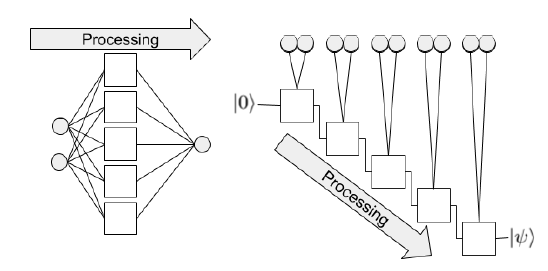

su rendimiento está directamente relacionado con el número de veces que se reintroducen los datos. Cuantas más capas se utilicen, mayor será la capacidad del modelo para aprender patrones complejos. Este enfoque, por tanto, no solo permite reducir la cantidad de recursos cuánticos necesarios, sino que también se ajusta bien a las restricciones de los dispositivos actuales en la era NISQ.




## Procesamiento durante la reintroducción de datos

El modelo de DRU, es un  modelo  que pertenece a la familia de los circuitos cuánticos parametrizados, donde las compuertas del circuito dependen de parámetros clásicos

- La entrada clásica se carga mediante **rotaciones unitarias** $U(\vec{x})$.
- El procesamiento se realiza mediante rotaciones con parámetros entrenables:  
   $$U(\vec{\theta}_i) \in SU(2)$$ donde  
   $$\vec{\theta}_i = (\theta_1, \theta_2, \theta_3)$$ para cada capa.



El modelo de DRU tiene la forma:

$$
U(\vec{\theta}, \vec{x}) = U(\vec{\theta}_N) U(\vec{x}) \cdots U(\vec{\theta}_1) U(\vec{x})
$$

El estado final será:

$$
|\psi\rangle = U(\vec{\theta}, \vec{x}) |0\rangle
$$

y La predicción se obtiene al medir este estado.


Cada capa del circuito combina una rotación basada en los datos $U(\vec{x})$
Y una rotación parametrizada $U(\vec{\theta}_i)

Esto se puede escribir como:

$$
L^{(i)} = U(\vec{\theta}_i) U(\vec{x})
$$

El clasificador completo es:

$$
U(\vec{\theta}, \vec{x}) = L^{(N)} \cdots L^{(1)}
$$

Por lo que la profundidad total  del circuito es $2N$. Al aumentar el número de capas aumenta la capacidad de representación del modelo y se puede aproximar funciones de decisión más complejas.


Cada capa puede codificar simultáneamente los datos de entrada $\vec{x}$ y  los parámetros entrenables $\vec{\theta}$ y esto se hace sumando los vectores y aplicando una única rotación:

$$
L^{(i)} = U\left( \vec{\theta}_i + \vec{w}_i \circ \vec{x} \right)
$$

Donde:
- $\vec{w}_i$ es un vector de pesos que escala cada componente de entrada. ademas si el vector $\vec{x}$ tiene menos de 3 dimensiones, se completa con ceros lo cual reduce a la mitad la profundidad del circuito. Aunque el circuito se hace más corto, puede perder capacidad de representar funciones no lineales esto debido  a que las rotaciones sucesivas no conmutan  y generan complejidad.

Los datos se introducen de forma lineal en la rotación,  sin embargo, la no linealidad surge de la forma en que se combinan las rotaciones.Esta estrategia es adecuada cuando no se conoce la estructura de los datos, ya que introduce pocos sesgos.

lo cual se puede usar especialmente bien con datos que tienen simetría rotacional, pero también es útil en otros caso como para manejar datos con más de 3 dimensiones, se puede:

1. Dividir el vector de entrada $\vec{x}$ en varios sub-vectores de 3 dimensiones:  

$$
\vec{x} = \left( \vec{x}^{(1)}, \vec{x}^{(2)}, \dots, \vec{x}^{(k)} \right)
$$

2. Aplicar una rotación separada por cada bloque:

$$
L^{(i)} = U\left( \vec{\theta}_i^{(k)} + \vec{w}_i^{(k)} \circ \vec{x}^{(k)} \right) \cdots U\left( \vec{\theta}_i^{(1)} + \vec{w}_i^{(1)} \circ \vec{x}^{(1)} \right)
$$





# Medición

---


Un circuito cuántico con parámetros clásicos genera un estado final:

$$
|\psi\rangle = U(\vec{\theta}, \vec{w})|0\rangle
$$

Este estado no puede observarse directamente; sólo se puede  medir por lo que cuando medimos el Qubit, obtenemos una probabilidad de colapso  $P(0)$ en $|0\rangle$  y  $|1\rangle$ con probabilidad $P(1)$, la regla de  decisión simple para clasificación binaria es Si $P(0) > P(1)$, entonces clase A  Si $P(0) \leq P(1)$, entonces clase B, aunque También puede usarse un umbral ajustable $\tau$ para introducir un sesgo:

* Si $P(0) > \tau$, clase A; de lo contrario, clase B

Este valor $\tau$ se optimiza con el conjunto de entrenamiento.


El problema surge cuando hay más de dos clases por lo que  se necesitan estrategias más elaboradas:

* **Método 1: Umbrales múltiples**

Dividir el intervalo $[0,1]$ de $P(0)$ en segmentos con tres umbrales $\tau_1, \tau_2, \tau_3$:

$$
0 \leq \tau_1 \leq \tau_2 \leq \tau_3 \leq 1
$$

Según en qué intervalo caiga $P(0)$, se asigna la clase correspondiente.

*  **Método 2: Conjunto de estados ortogonales**

Asignar clases según cuál es el estado **más cercano** a un conjunto de estados de referencia ortogonales:

$$
\text{Clase predicha} = \arg\max_i \left| \langle \psi_i | \psi_{\text{final}} \rangle \right|^2
$$

Esto es similar a una proyección en espacios vectoriales clásicos.

---


#Geometría del clasificador


---

El estado de un qubit puede representarse como un punto sobre la esfera de Bloch donde:

* $|0\rangle$ está en el polo norte
* $|1\rangle$ en el polo sur
* Las superposiciones son puntos intermedios

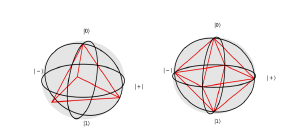

> Las compuertas cuánticas rotan ese punto sobre la esfera.



Con una sola operación unitaria (rotación), se puede transformar cualquier punto en otro punto de la esfera de Bloch aunque cuando hay muchos datos diferentes, una sola rotación puede ser óptima para unos puntos pero perjudicial para otros.

Esto se puede solucionar al aplicar múltiples capas de compuertas cuánticas (como en una red neuronal profunda), cada una realiza una rotación distinta. El conjunto total genera un mapa de características cuántico, el cual transforma los datos al espacio de la esfera  y separa las clases en regiones distintas,  útil para separar clases complejas, como lo hacen las redes neuronales clásicas con capas no lineales.

# Clasificación Cuántica con Funciones de Costo Basadas en Fidelidad

---

En mecánica cuántica, la fidelidad  es una medida que indica que tan cerca están dos estados cuánticos entre sí,es decir:

Para dos estados puros $|\psi\rangle$ y $|\phi\rangle$, la fidelidad se define como:

$$
F(|\psi\rangle, |\phi\rangle) = |\langle \psi | \phi \rangle|^2
$$

* Si los estados son idénticos: fidelidad = 1.
* Si son ortogonales: fidelidad = 0.


Un clasificador cuántico puede mapear una entrada clásica (como un número real o vector) a un estado cuántico mediante un circuito cuántico. Luego, se mide ese estado, y la salida (por ejemplo, la probabilidad de obtener $|0\rangle$ o $|1\rangle$) se interpreta como una predicción de clase.

En el caso de un solo qubit, los estados posibles están sobre la esfera de Bloch. Podemos usar posiciones específicas (por ejemplo, los vértices de un tetraedro o un octaedro) para representar clases.


A continuación se presentan dos funciones de costo comunes.


## ¿Cómo se haria la clasificación?

1. **Codificación de datos**: el dato clásico $\vec{x}$ se codifica en un circuito cuántico con parámetros $\vec{\theta}, \vec{w}$, que lo transforman en un estado cuántico $|\psi(\vec{\theta}, \vec{w}, \vec{x})\rangle$.

2. **Estados de etiqueta**: cada clase $c$ se representa con un estado específico $|\tilde{c}\rangle$ en la esfera de Bloch.

3. **Comparación mediante fidelidad**: finalmente se calcula la fidelidad entre el estado de salida del circuito y el estado etiquetado.

---

##  Fidelidad estándar:

---

Queremos que el estado de salida esté lo más alineado posible con su etiqueta cuántica correspondiente,  lo que esta función busca  es maximizar la fidelidad entre el estado final del circuito y el estado de etiqueta correcto para cada punto de entrenamiento. Se define como:

$$
\chi^2_f(\vec{\theta}, \vec{w}) = \sum_{\mu=1}^M \left(1 - \left| \langle \tilde{s}_\mu | (\vec{\theta}, \vec{w}, \vec{x}_\mu) \rangle \right|^2 \right)
$$

Donde:

* $M$ es el número de datos.
* $|\tilde{s}\rangle$ es el estado etiquetado.
* $|\psi\rangle$ es el estado que produce el circuito.

Se minimiza cuando la fidelidad es máxima, es decir, cuando el estado de salida es igual al de la clase correspondiente.

---

###Fidelidad ponderada

---

Inspirada en redes neuronales, esta función evalúa la fidelidad con todas las clases posibles, no solo con la correcta,

Al minimizar $ \chi^2_{wf}$  ⇒ maximiza la fidelidad con la clase correcta y minimiza con las incorrectas.


$$
\chi^2_{wf}(\vec{\beta}, \vec{\theta}, \vec{w}) = \frac{1}{2} \sum_{\mu=1}^M \left( \sum_{c=1}^C \left( \beta_c F_c(\vec{\theta}, \vec{w}, \vec{x}_\mu) - Y_c(\vec{x}_\mu) \right)^2 \right)
$$

* $\beta_c$: peso de la clase.
* $F_c$: fidelidad con la clase $c$.
* $Y_c$: fidelidad esperada.



> * La función de costo $\chi^2_f$ resulta adecuada en escenarios iniciales de experimentación o en problemas de clasificación con un número reducido de clases, debido a su menor complejidad computacional.
> * Por otro lado, $\chi^2_{wf}$ es más apropiada en contextos donde se requiere una mayor precisión en la clasificación multiclase, ya que permite un control más fino sobre las fidelidades con respecto a todas las clases posibles.

Para estimar la fidelidad de un estado cuántico, es viable realizar una tomografía completa en sistemas de un solo qubit. Sin embargo, en tareas de clasificación multiclase, una única medición optimizada suele ser más eficiente que múltiples mediciones.

La función de costo basada en fidelidad ponderada no solo aproxima el estado cuántico hacia la clase correcta, sino que también lo aleja de las clases incorrectas, a diferencia de la función de fidelidad estándar. Este enfoque mejora el rendimiento clasificatorio a costa de una mayor demanda en el proceso de optimización clásica. Este compromiso es especialmente valioso en la computación cuántica NISQ, donde reducir la complejidad del circuito cuántico es prioritario.


#Universalidad del clasificador de un solo qubit

Dado que un clasificador cuántico tipo DRU puede aproximar cualquier función con precisión arbitraria, se ha recopilado evidencia empírica que respalda esta capacidad al aplicarlo a diversos problemas de clasificación. Esta propiedad se sustenta teóricamente en el Teorema de Aproximación Universal (UAT),

Para extender esta idea a nuestro campo, se traza un paralelismo entre el teorema y la estructura del clasificador de un solo qubit, construido con rotaciones del grupo SU(2). Esto permite vincular la capacidad de aproximación de las redes neuronales con la de los circuitos cuánticos, mostrando que un único qubit puede representar funciones de clasificación complejas.

comenzamos con el teorema de Aproximación Universal

**Teorema:**  
>Sea $I^m = [0, 1]^m$ el cubo unidad en $\mathbb{R}^m$ y sea $C(I^m)$ el espacio de funciones continuas sobre $I^m$. Sea $\varphi : \mathbb{R} \to \mathbb{R}$ una función no constante, acotada y continua. Para toda función $f : I^m \to \mathbb{R}$ y para todo $\varepsilon > 0$. existe un entero $ N \in \mathbb{N}$ y una función $h : I^m \to \mathbb{R}$ de la forma:

$$
h(\vec{x}) = \sum_{i=1}^N \beta_i \, \varphi(\vec{w}_i \cdot \vec{x} + b_i),
$$

donde $\beta_i, b_i \in \mathbb{R}$ y $\vec{w}_i \in \mathbb{R}^m$, tal que:

$$
|h(\vec{x}) - f(\vec{x})| < \varepsilon \quad \forall \vec{x} \in I^m.
$$

- $\vec{x}$ es la entrada (un vector en $\mathbb{R}^m$ ),
- $\vec{w}_i$ son los pesos del modelo,
- $b_i$ son los sesgos.
- $\beta_i$ son los pesos de salida,
- $\varphi$ es la función de activación (por ejemplo, una sigmoide o ReLU).

Es decir:

> Cualquier función continua $f$, definida sobre un dominio compacto (en este caso, el cubo unidad $I^m = [0,1]^m$, puede ser aproximada tan bien como se desee por una red neuronal de una sola capa oculta, siempre que tenga suficientes neuronas.


Ahora entrando en el clasificador cuántico propuesto, este se compone de múltiples capas, cada una de las cuales implementa una matriz de rotación del grupo $\text{SU}(2)$. Una de las descomposiciones estándar utilizadas es:

$$
U(\vec{\theta}) = U(\theta_1, \theta_2, \theta_3) = e^{i \theta_2 \sigma_z} e^{i \theta_1 \sigma_y} e^{i \theta_3 \sigma_z},
$$

donde $\sigma_i$ son las matrices de Pauli. Utilizando las propiedades del grupo $\text{SU}(2)$, esta operación se puede reescribir como una única exponencial:

$$
U(\vec{\theta}) = e^{i \vec{\omega}(\vec{\theta}) \cdot \vec{\sigma}},
$$

donde los componentes de $\vec{\omega}(\vec{\theta})$ están dados por:

- $\omega_1 = d_N \sin\left( \frac{\theta_2 - \theta_3}{2} \right) \sin\left( \frac{\theta_1}{2} \right) $
- $\omega_2 = d_N \cos\left( \frac{\theta_2 - \theta_3}{2} \right) \sin\left( \frac{\theta_1}{2} \right)$
- $\omega_3 = d_N \sin\left( \frac{\theta_2 + \theta_3}{2} \right) \cos\left( \frac{\theta_1}{2} \right)$

con

$$
d_N = \left( \sqrt{1 - \cos^2 d} \right)^{-1}, \quad \text{y} \quad \cos d = \cos\left( \frac{\theta_2 + \theta_3}{2} \right) \cos\left( \frac{\theta_1}{2} \right).
$$

Cada unidad codifica los datos $\vec{x}$ mediante una función afín en los parámetros:

$$
\vec{\theta}(\vec{x}) = \vec{\alpha} + \vec{w} \circ \vec{x},
$$

donde $\vec{\alpha}$ y $\vec{w}$ son parámetros entrenables, y $\circ$ denota el producto elemento a elemento (producto de hadamard). Así, la unidad cuántica completa puede representarse como:

$$
U(\vec{x}) = \prod_{i=1}^N U_i(\vec{x}) = \prod_{i=1}^N \exp\left( i \vec{\omega}(\vec{\theta}_i(\vec{x})) \cdot \vec{\sigma} \right).
$$

Finalmente, aplicando la fórmula de Baker-Campbell-Hausdorff (BCH), esta expresión se puede aproximar como:

$$
U(\vec{x}) \approx \exp\left( i \sum_{i=1}^N \vec{\omega}(\vec{\theta}_i(\vec{x})) \cdot \vec{\sigma} + \mathcal{O}_{\text{corr}} \right),
$$

donde $\mathcal{O}_{\text{corr}}$ contiene términos de conmutación adicionales, también expresables en términos de matrices de Pauli, debido a que $[\sigma_i, \sigma_j] = 2i \varepsilon_{ijk} \sigma_k$.

Ahora debida a que el DRU está basado en rotaciones unitarias, que se describen matemáticamente como exponenciales de combinaciones lineales de matrices de Pauli. Estas rotaciones generan funciones trigonométricas al actuar sobre los datos de entrada $\vec{x}$. de esta forma:

$$
\vec{\omega}(\vec{\theta}_i(\vec{x})) = (\omega_1, \omega_2, \omega_3)
$$

Luego estas funciones son no constantes, acotadas y continuas por que cumples las condiciones que se requieren para aplicar el Teorema de Aproximación Universal.

Cuabdo se suman estos términos trigonométricos  de varias capas o compuertas cuánticas:

$$
\sum_{i=1}^N \vec{\omega}(\vec{\theta}_i(\vec{x})) = (f_1(\vec{x}), f_2(\vec{x}), f_3(\vec{x}))
$$

Esta suma puede verse como una función vectorial que depende de los datos de entrada. Es análoga a lo que hace una red neuronal: sumar activaciones ponderadas por pesos y sesgos.

La expansión de Baker-Campbell-Hausdorff (BCH) aparece al combinar rotaciones cuánticas sucesivas. En vez de aplicar esta expansión directamente, se agrupan los términos de corrección $\mathcal{O}_{\text{corr}}$ en una sola nueva función $\vec{\rho}(\vec{x})$, y se redefinen las rotaciones como:

$$
U(\vec{x}) = e^{i \vec{\xi}(\vec{x}) \cdot \vec{\sigma}} = e^{i \vec{f}(\vec{x}) \cdot \vec{\sigma} + i \vec{\rho}(\vec{x}) \cdot \vec{\sigma}}
$$

Es decir, toda la transformación cuántica final sobre el qubit puede ser escrita como una rotación con argumento trigonométrico complejo dependiente de $\vec{x}$.

Como no se puede copiar el estado cuántico (por el teorema de no-clonación), el dato de entrada debe reintroducirse en cada capa del circuito cuántico. Esto es equivalente a alimentar cada neurona con los datos originales en una red clásica.


#Clasificador cuántico DRU de múltiples Qubits

---


ElDRU de un solo qubit no ofrece ventajas significativas frente a técnicas clásicas de clasificación, como las redes neuronales artificiales (ANN).Anteriormente, se presentó una formulación cuántica análoga a una red neuronal con una sola capa oculta. Sin embargo, es bien sabido que, para aproximar funciones arbitrarias con precisión mediante una arquitectura de capa única, se requiere un número considerable de neuronas ocultas. Esta limitación es evitada en las redes neuronales profundas, donde múltiples capas permiten una representación jerárquica más eficiente de las características del dato.

En base a  esta analogía, se puede proponer una  extensión del clasificardor cuántico DRU  de un solo qubit a un clasificador DRU de múltiples qubits ya que la incorporación de varios qubits al sistema puede incrementar su capacidad de catar los atrones complejos de un conjunto de datos de forma análoga a cómo el aumento de capas mejora el rendimiento de una red neuronal. Además, al introducir entrelazamiento entre los qubits, no solo se incrementa la complejidad funcional del modelo sin aumentar el número de capas, sino que también se abre la posibilidad de lograr una ventaja cuántica real en tareas de clasificación.

La Figura 1 muestra la correspondencia conceptual entre una red neuronal con una sola capa oculta y el clasificador cuántico de un solo qubit. No obstante, la generalización de esta analogía al caso de múltiples qubits no es directa. Un clasificador cuántico sin entrelazamiento podría asemejarse superficialmente a una red neuronal convolucional, donde cada qubit funciona como un procesador local e independiente. Sin embargo, el efecto del entrelazamiento entre qubits no se deja traducir fácilmente al marco de redes neuronales profundas, y su interpretación desde la óptica del aprendizaje profundo sigue siendo un problema abierto. En esta sección se introduce una propuesta general para el diseño de clasificadores cuánticos de múltiples qubits, y su desempeño será comparado con el caso de un solo qubit en la Sección 6.

---

###Medición y Funciones De Costo

---

Anteriormente la dinamica de medición consistía en comparar el estado final de la evolución unitaria con un estado objetivo predefinido. Esto requería únicamente la implementación de un protocolo de tres mediciones, una tarea experimentalmente  viable. Sin embargo, cuando se consideran múltiples qubits, la medicion se vuelve exponencialmente costosa en función del número de Qubits, lo que hace inviable esta aproximación para escalas mayores.

hay dos estrategias prouestas de medición para clasificadores DRU de múltiples qubits:

1. **Estrategia de base computacional**: Esta es una generalización directa del enfoque de un solo qubit, donde el estado final del circuito se compara con un estado particular de la base computacional, asignado a cada clase. Aunque conceptualmente sencilla, esta estrategia escala mal debido al costo exponencial de la tomografía en múltiples qubits.

2. **Estrategia focalizada en un solo qubit**: Similar a propuestas previas de clasificadores cuánticos binarios, esta estrategia consiste en observar únicamente uno de los qubits al final del circuito. En función de su estado se asigna una clase. Extendemos esta idea al caso multiclase mediante la introducción de umbrales múltiples sobre el valor esperado del observable correspondiente. Esta estrategia requiere menos recursos experimentales y permite una reducción significativa en el número de parámetros a optimizar.

Estas estrategias da lugar a una definición distinta de función de costo. Para la primera estrategia utilizamos la función de fidelidad cuántica, generalizada directamente del caso de un solo qubit. En este caso, los estados objetivo corresponden a vectores de la base computacional, aunque en principio podrían considerarse otros conjuntos ortonormales más adecuados a la tarea de clasificación. Para la segunda estrategia, se emplea una función de fidelidad ponderada centrada en el qubit medido:

$$
F_{c,q}(\vec{\theta}, \vec{w}, \vec{x}) = \langle \tilde{c} | \rho_q(\vec{\theta}, \vec{w}, \vec{x}) | \tilde{c} \rangle,
$$

donde $\rho_q$ es la matriz densidad reducida del qubit $q$, y $|\tilde{c}\rangle$ es el estado objetivo asociado a la clase $c$. La correspondiente función de costo global es:

$$
\chi^2_{\mathrm{wf}}(\vec{\beta}, \vec{\theta}, \vec{w}) = \frac{1}{2} \sum_{\mu=1}^{M} \sum_{c=1}^{C} \sum_{q=1}^{Q} \left( \beta_{c,q} F_{c,q}(\vec{\theta}, \vec{w}, \vec{x}_\mu) - Y_c(\vec{x}_\mu) \right)^2,
$$

donde se promedia sobre los $Q$ qubits del clasificador. Si se mide únicamente uno de ellos, el número de parámetros a optimizar se reduce proporcionalmente.


### Ejemplos de Circuitos Cuánticos en Clasificadores Parametrizados

Claro, aquí tienes un **resumen académico** del texto que se adapta bien a un curso de QML:

---

### Resumen: Circuitos Cuánticos en Clasificadores Parametrizados

El diseño de clasificadores cuánticos requiere definir un ansatz, es decir, una estructura del circuito con compuertas locales y, opcionalmente, compuertas de entrelazamiento. A diferencia de las redes neuronales clásicas, los clasificadores cuánticos pueden aprovechar el entrelazamiento como recurso para representar correlaciones complejas entre qubits.

Se distinguen dos tipos de circuitos:

* **Sin entrelazamiento**: cada qubit evoluciona de forma independiente mediante rotaciones. Son simples, pero limitados en expresividad.
* **Con entrelazamiento**: se incluyen compuertas CZ entre qubits, lo que incrementa la capacidad del modelo para capturar patrones complejos, a costa de mayor profundidad y número de parámetros.

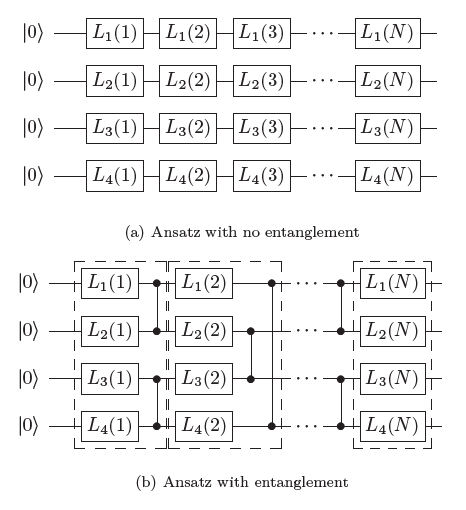


En general, introducir entrelazamiento duplica o cuadruplica los parámetros requeridos, y aumenta la profundidad del circuito de $N$ a aproximadamente $2N$ capas.


# Métodos de Minimización

En el entrenamiento de clasificadores cuánticos ya sean de uno o varios qubits, se requiere  minimizar una función de costo sobre un espacio de parámetros que incluye los ángulos de rotación de las compuertas cuánticas, los pesos que codifican los datos clásicos de entrada y otros parámetros adicionales en caso de usar funciones de costo más complejas (por ejemplo, fidelidad con pesos por clase).

Este proceso de entrenamiento es un ejemplo de algoritmo híbrido cuántico-clásico, donde los circuitos cuánticos son evaluados por un ordenador cuántico o simulador, mientras que la optimización se realiza clásicamente.

Los clasificadores cuánticos generan funciones altamente no lineales debido a la composición de funciones trigonométricas lo cual produce un paisaje de optimización con múltiples mínimos locales, se puede consideran dos métodos clásicos de minimización:

### 1. Stochastic Gradient Descent (SGD)

- Estrategia descendente por gradiente.
- Util cuando se tiene un gran conjunto de entrenamiento.
- Puede escapar de mínimos locales con facilidad debido a su naturaleza estocástica.

### 2. L-BFGS-B

- Método cuasi-Newtoniano eficiente.
- Más robusto frente a mínimos locales, especialmente útil cuando el conjunto de datos de entrenamiento es pequeño.
- Utilizado por defecto en este trabajo debido a sus buenos resultados y rapidez.

En este caso se encontró que L-BFGS-B supera a SGD en la mayoría de los escenarios evaluados, especialmente cuando se cuenta con recursos computacionales limitados.



In [ ]:
#consideremos un problema, en el que tenemos una distribucion de puntos en plano con etiquetas azul o rojo segun esten dentro o fuera de un circulo
#el objetivo es entrenar un circuito variacional que distinga entre las etiquetas azul o roja
!pip install pennylane --quiet
import pennylane as qml
from pennylane import numpy as np
from pennylane import AdamOptimizer
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42) #reproducibilidad
#generacion de etiquetas de datos
def circulo(samples, center = [0,0], radio = np.sqrt(2/np.pi)):
  #numero de muestras
  #centro en 0.0 por defecto
  x_vals,y_vals = [],[] #aqui guardo los datos

  for i in range(samples):
    x = 2* (np.random.rand(2)) - 1  #vector aleatorio entre -1 y 1
    y = 0                          #el punto esta afuera

    if np.linalg.norm(x-center) < radio :  #distancia euclidea entre el punto y el centro
      y = 1                                #el punto esta dentro
    x_vals.append(x)                       #agregamos los valores
    y_vals.append(y)
  return np.array(x_vals, requires_grad=False), np.array(y_vals, requires_grad=False)


In [ ]:
#configuracion grafica
def grafica(x,y,titulo):
  fig,ax = plt.subplots(1,1,figsize = (5,5))
#etiquetado
  reds = y == 0
  blue = y == 1

  ax.scatter(x[reds,0],x[reds,1], color = 'red',s = 20,edgecolor = 'k')
  ax.scatter(x[blue,0],x[blue,1], color = 'blue',s = 20,edgecolor = 'k')
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_title(titulo)
  plt.show()

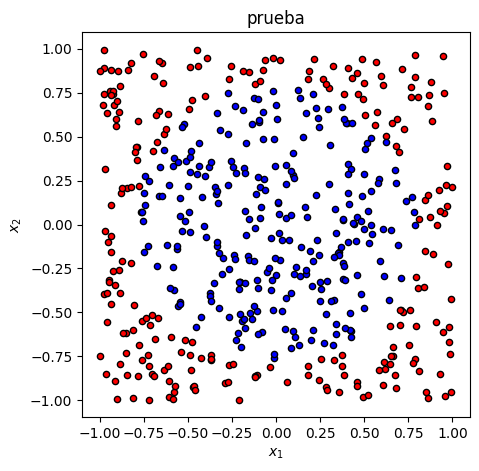

In [ ]:
Xdata, ydata = circulo(500)
grafica(Xdata, ydata, 'prueba')

In [ ]:
def matriz_densidad(estado):            # ρ = ∣ψ⟩ ⟨ψ∣= ψ ⋅ ψ†
  return estado * np.conj(estado).T

In [ ]:
#estados que representan las etiquetas de los datos
label_0 = [[1],[0]] #|0⟩=[1 , 0]
label_1 = [[0],[1]]  #|1⟩=[0 , 1]
state_labels = np.array([label_0, label_1], requires_grad=False)
state_labels

tensor([[[1],
         [0]],

        [[0],
         [1]]], requires_grad=False)

In [ ]:
#circuito cuantico simulado de un qubit con el backend  "lightning.qubit"
dev = qml.device("default.qubit", wires=1)

In [ ]:
@qml.qnode(dev)  #lo que permite ejecutarla y derivarla automáticamente con PennyLane
#Esta función implementa un circuito variacional.
def circuito(parametros,x,y):
  for p in parametros:     #aplica una rotación general
    qml.Rot(*x,wires = 0)  #primero se codifica la entrada x como una rotacion
    qml.Rot(*p,wires = 0)  #cada conjunto p de parámetros del modelo se aplica al qubit.
  return qml.expval(qml.Hermitian(y,wires = [0]))  #Fidelidad= ⟨ψ_in ∣ y ∣ψ_out⟩


In [ ]:
#calcula el costo en cada bach de datos
def costo(parametros, x, y, state_labels=None):
  # inicializa la variable para acumular el valor de la pérdida
  loss = 0
  # convierte los vectores de estado en matrices de densidad: ρ = |ψ⟩⟨ψ|
  dm_labels = [matriz_densidad(s) for s in state_labels]
  # recorre todos las muestras del conjunto de entrenamient
  for i in range(len(x)):
        # ejecuta el circuito con los parámetros actuales, usando la entrada x[i]
        # y la etiqueta deseada convertida a matriz de densidad.
        f = circuito(parametros, x[i], dm_labels[y[i]])

        # calculo el error cuadrático respecto a la fidelidad y lo acumula
        # (1 - f)^2 penaliza salidas que no coinciden con la etiqueta esperada
        loss = loss + (1 - f)**2

    # cevuelve el valor promedio de la pérdida
  return loss / len(x)

In [ ]:
def test(parametros,x,y,state_labels=None):
    valores_fidelidad = list()  #lista para guardar todas las fidelidades por muestra
    prediccion = list()         #lista para guardar la etiqueta predicha

    #convertimos los vectores de estado a matrices de densidad: ρ = |ψ⟩⟨ψ|
    dm_labels = [matriz_densidad(s) for s in state_labels]

    #recorremos todas las entradas x[i]
    for i in range(len(x)):
        #definimos una funcion que mide la fidelidad entre la salida del circuito y una matriz de densidad dada
        funcion_fidelidad = lambda y: circuito(parametros, x[i], y)

        #calculamos fidelidad entre la salida del circuito y cada etiqueta posible
        fidelidades = [funcion_fidelidad(dm) for dm in dm_labels]

        #elegimos la etiqueta con mayor fidelidad
        mejor_fidelidad = np.argmax(fidelidades)

        # guardamos resultados
        prediccion.append(mejor_fidelidad)
        valores_fidelidad.append(fidelidades)

    #convertimos listas a arrays
    return np.array(prediccion), np.array(valores_fidelidad)

In [ ]:
#produce minibatches de datos a partir de los arrays de entrada y etiquetas.
def puntaje_de_acierto(y_true, y_pred):
    score = y_true == y_pred  # comparación elemento a elemento, devuelve array de booleanos
    return score.sum() / len(y_true)  # aciertos / total de  muestras

In [ ]:
#produce minibatches de datos a partir de los arrays de entrada y etiquetas.
def iteracio_minibachtes(inputs, targets, batch_size):
    # itera desde el indice 0 hasta el ultimo indice posible para un batch completo
    for index_start in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        # crea un slice desde el índice de inicio hasta el final del batch
        index_ = slice(index_start, index_start + batch_size)
        # devuelve el minibatch de entradas y sus etiquetas correspondientes
        yield inputs[index_], targets[index_]

In [ ]:
np.random.seed(42)
# generacion datos de entrenamiento y prueba
num_training = 200
num_test = 2000

Xdata, y_train = circulo(num_training)
X_train = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False)))

Xtest, y_test = circulo(num_test)
X_test = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False)))

# entrenamiento con Adam
num_layers = 3
learning_rate = 0.6
epochs = 10
batch_size = 32

opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)

# evaluacion inicial
predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
accuracy_train = puntaje_de_acierto(y_train, predicted_train)

predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
accuracy_test = puntaje_de_acierto(y_test, predicted_test)

initial_predictions = predicted_test
loss = costo(params, X_test, y_test, state_labels)

print( 'epoca: {:2d} /costo: {:3f} /acierto en el conjunto de prueba: {:3f} / acierto en el conjunto de entrenamiento : {:3f}'.format(0, loss, accuracy_train, accuracy_test))

# entrenamiento por epocas
for it in range(epochs):
    for Xbatch, ybatch in iteracio_minibachtes(X_train, y_train, batch_size=batch_size):
        params, _, _, _ = opt.step(costo, params, Xbatch, ybatch, state_labels)

    predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
    accuracy_train = puntaje_de_acierto(y_train, predicted_train)
    loss = costo(params, X_train, y_train, state_labels)

    predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
    accuracy_test = puntaje_de_acierto(y_test, predicted_test)

    print( 'epocas: {:2d}/ perdida : {:3f}/acierto en el conjunto de entrenamiento: {:3f}/acierto en el conjunto de prueba: {:3f}'.format(it + 1, loss, accuracy_train, accuracy_test)    )

epoca:  0 /costo: 0.331694 /acierto en el conjunto de prueba: 0.540000 / acierto en el conjunto de entrenamiento : 0.543500
epocas:  1/ perdida : 0.188495/acierto en el conjunto de entrenamiento: 0.710000/acierto en el conjunto de prueba: 0.746000
epocas:  2/ perdida : 0.173300/acierto en el conjunto de entrenamiento: 0.755000/acierto en el conjunto de prueba: 0.744500
epocas:  3/ perdida : 0.129624/acierto en el conjunto de entrenamiento: 0.845000/acierto en el conjunto de prueba: 0.843500
epocas:  4/ perdida : 0.130503/acierto en el conjunto de entrenamiento: 0.810000/acierto en el conjunto de prueba: 0.830500
epocas:  5/ perdida : 0.131384/acierto en el conjunto de entrenamiento: 0.795000/acierto en el conjunto de prueba: 0.826000
epocas:  6/ perdida : 0.127547/acierto en el conjunto de entrenamiento: 0.840000/acierto en el conjunto de prueba: 0.823500
epocas:  7/ perdida : 0.123795/acierto en el conjunto de entrenamiento: 0.845000/acierto en el conjunto de prueba: 0.844500
epocas: 

costo: 0.111306/precision del entrenamiento: 0.885000/precision de la prueba: 0.919500
pesos aprendidos:
capa 0: [-0.16805364  1.41074004 -0.03989615]
capa 1: [ 1.51155974  0.15346313 -0.16387476]
capa 2: [ 1.93209884 -1.6010824   0.38213947]


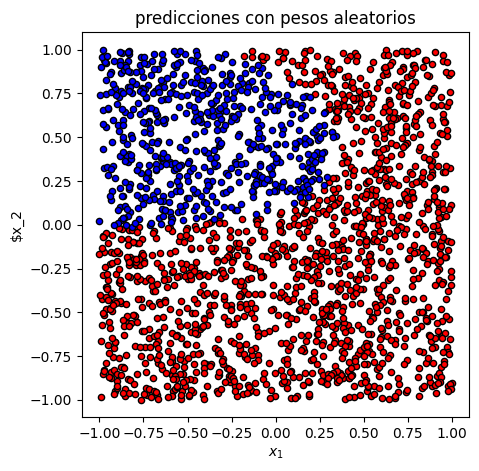

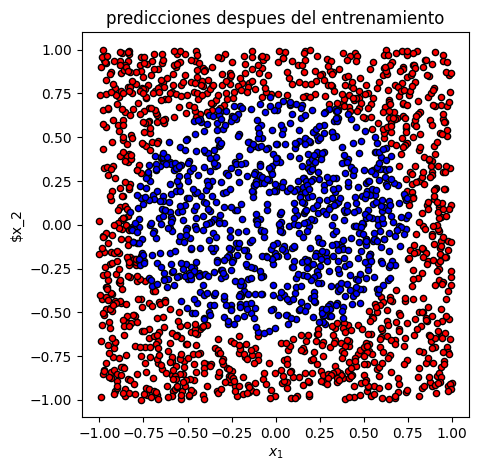

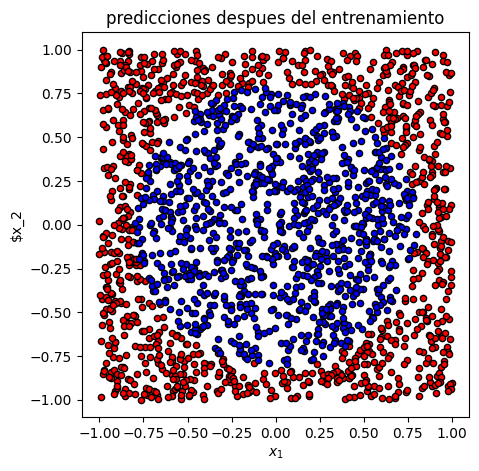

In [ ]:
#costo y las precisiones despues del entrenamiento
print('costo: {:3f}/precision del entrenamiento: {:3f}/precision de la prueba: {:3f}'.format(loss, accuracy_train, accuracy_test))

# parametros aprendidos
print("pesos aprendidos:")
for i in range(num_layers):
    print("capa {}: {}".format(i, params[i]))
#predicciones iniciales, finales y etiquetas reales

grafica(X_test[:, :2], initial_predictions, 'predicciones con pesos aleatorios')
grafica(X_test[:, :2], predicted_test,'predicciones despues del entrenamiento')
grafica(X_test[:, :2], y_test,'predicciones despues del entrenamiento')